# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
For this project, we are doing analysis towards outage dataset. The dataset contains a time period from January 2000 to July 2016, providing a lot of outage cases with different climate region, causes and factors. Since there are too many factors, only a part of them are useful to make hypothesis test. Thus, we do the following steps to clean up data and filter these important factors to make hypothesis test, finding the relationships between certain factors.


### Cleaning and EDA
We cleaned up the data to make entire dataset more readable by deleting useless data columns, reform 2 columns contains the information about OUTAGE time and filter out unrelated rows. Then based on cleaned dataset, we did Univariate Analysis, Bivariate Analysis and Interesting Aggregates to find out the relationships between certain variables. For example, we did univariate analysis to 'YEAR', 'MONTH', 'U.S._STATE', 'CLIMATE REGION' and 'CAUSE CATEGORY', plotting them using methods. Then we did bivariate analysis to 'CLIMATE.REGION' with'U.S._STATE', 'CLIMATE.REGION' with 'CAUSE CATEGORY', and 'CLIMATE.REGION' with 'OUTAGE DURATION', trying to use plotting for find their relationships. At last, we did interesting aggregates to 'CLIMATE.REGION','OUTAGE.DURATION','YEAR'. 

### Assessment of Missingness
For this part, We identify some nmar columns and study the rest of the data, we pick the column "CAUSE.CATEOGORY" specifically to anaylsis its dependency with other columns. More specifically, we pick columns ANOMALY.LEVEL, ANOMALY.LEVEL, POPDEN_UC and POPDEN_RURAL to study their relationship which means determine if the missingness in "CAUSE.CATEGORY" depends on these four columns. The conclusion we make in here is that the missingness of CAUSE.CATEGORY is dependents with ANOMALY.LEVEL, POPDEN_UC and POPDEN_RURAL but not with ANOMALY.LEVEL

### Hypothesis Test
Our hypothesis is that Null hypothesis: The probability that an outage occurs in the South during 2011 is equal to the probability that it occurs in the West during 2011 with a significant value of 0.05. After we do the hypothesis testing, we find out that we need to reject the null hypothesis since the p_value we get is around 0.012 which is lower than the p value

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

Read the original table, reform it and then clean up all the useless info stored in columns and rows. Combine 4 required columns. 

In [2]:
# read the table
df = pd.read_excel('outage.xlsx')
df

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226


In [3]:
#Combine OUTAGE.START.DATE and OUTAGE.START.TIME into a new datetime column called OUTAGE.START
#Make a copy from original table
out = df.copy()
#Remove unrelated rows and reset the index
out = out.drop(index = [0,1,2,3,5]).reset_index(drop=True)
#Rename the columns 
out.columns = out.iloc[0]
#Remove unrelated rows
out = out.drop(index = [0])
#Remove unrelated columns
out = out.drop(columns=['variables'])
#Combine OUTAGE.START.DATE and OUTAGE.START.TIME into a new datetime column called OUTAGE.START
out['OUTAGE.START'] = pd.to_datetime(out['OUTAGE.START.DATE']).astype(str) + " " +out['OUTAGE.START.TIME'].astype(str)
out['OUTAGE.START'] = out['OUTAGE.START'].replace('nannan',np.NaN)
out['OUTAGE.START'] = out['OUTAGE.START'].replace('NaT nan',np.NaN)
out['OUTAGE.START'] = pd.to_datetime(out['OUTAGE.START'])
 
#combine OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME into a new datetime column called OUTAGE.RESTORATION.
out['OUTAGE.RESTORATION'] = pd.to_datetime(out['OUTAGE.RESTORATION.DATE']).astype(str) + " " +out['OUTAGE.RESTORATION.TIME'].astype(str)
out['OUTAGE.RESTORATION'] = out['OUTAGE.RESTORATION'].replace('nannan',np.NaN)
out['OUTAGE.RESTORATION'] = out['OUTAGE.RESTORATION'].replace('NaT nan',np.NaN)
out['OUTAGE.RESTORATION'] = pd.to_datetime(out['OUTAGE.RESTORATION'])
out

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
1,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
2,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
3,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
4,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
5,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,2011-12-06 00:00:00,...,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,2011-12-06 08:00:00,2011-12-06 20:00:00
1531,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,...,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,NaT,NaT
1532,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,2009-08-29 00:00:00,...,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226,2009-08-29 22:54:00,2009-08-29 23:53:00
1533,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,2009-08-29 00:00:00,...,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226,2009-08-29 11:00:00,2009-08-29 14:01:00


Making a plot to find out the cases happened in each state

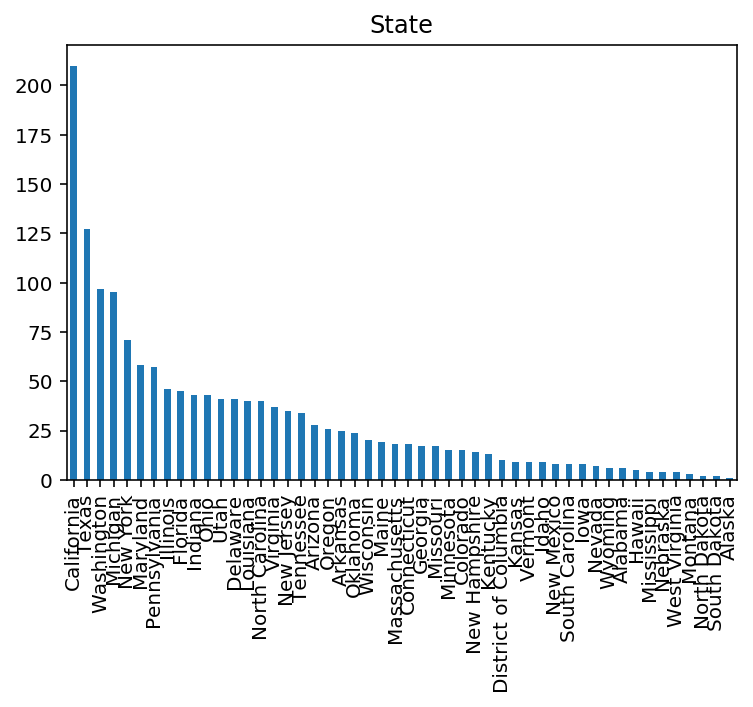

In [4]:
#Univariate Analysis
#Plot of State
plot = out['U.S._STATE'].value_counts().plot(kind='bar',title='State')
plt.show()

Making a plot to find out the cases happened in each climate region

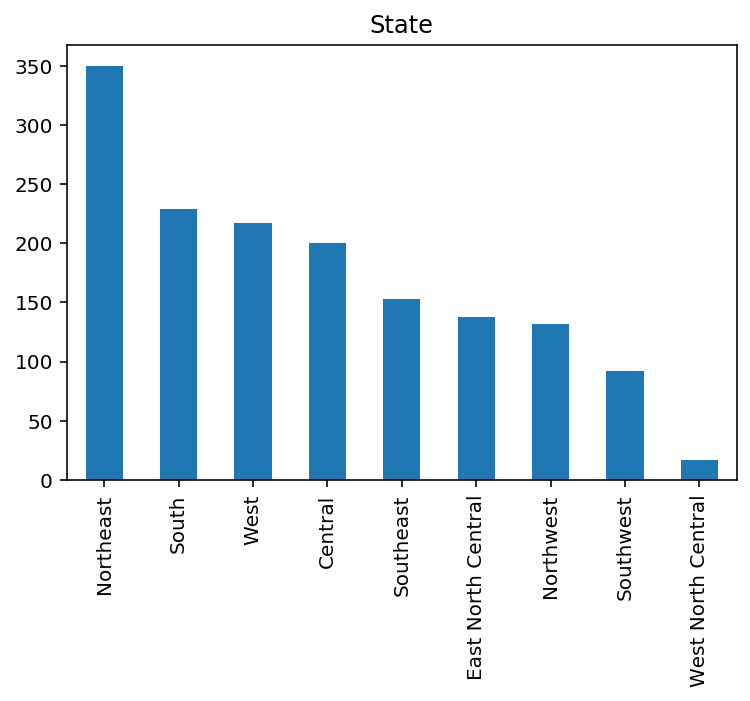

In [5]:
#Plot of Climate Region
plot = out['CLIMATE.REGION'].value_counts().plot(kind='bar',title='State')
plt.show()

Making a plot to find out the cases happened in each year

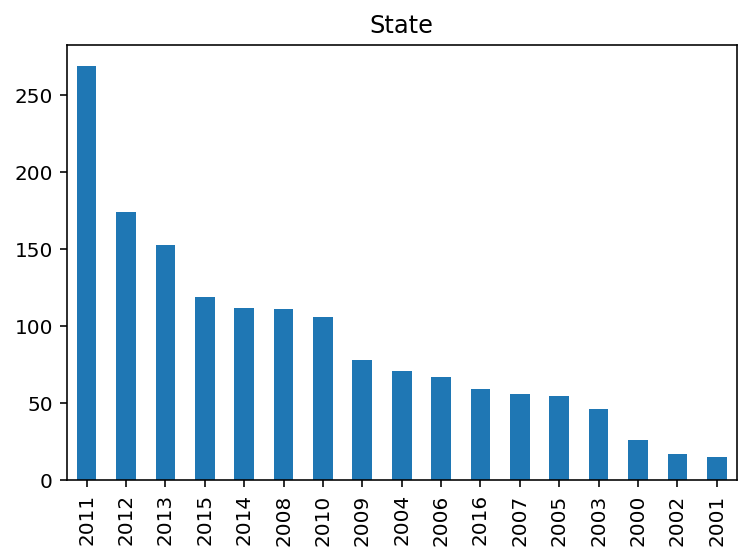

In [6]:
#Plot of Year
plot = out['YEAR'].value_counts().plot(kind='bar',title='State')
plt.show()

Making a plot to find out the cases happened in each month

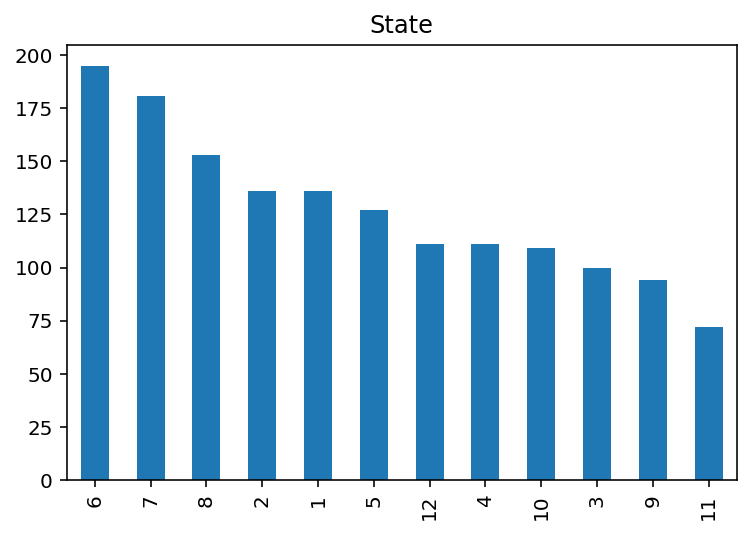

In [7]:
#Plot of Month
plot = out['MONTH'].value_counts().plot(kind='bar',title='State')
plt.show()

Making a plot to find out the cases happened in each cause category

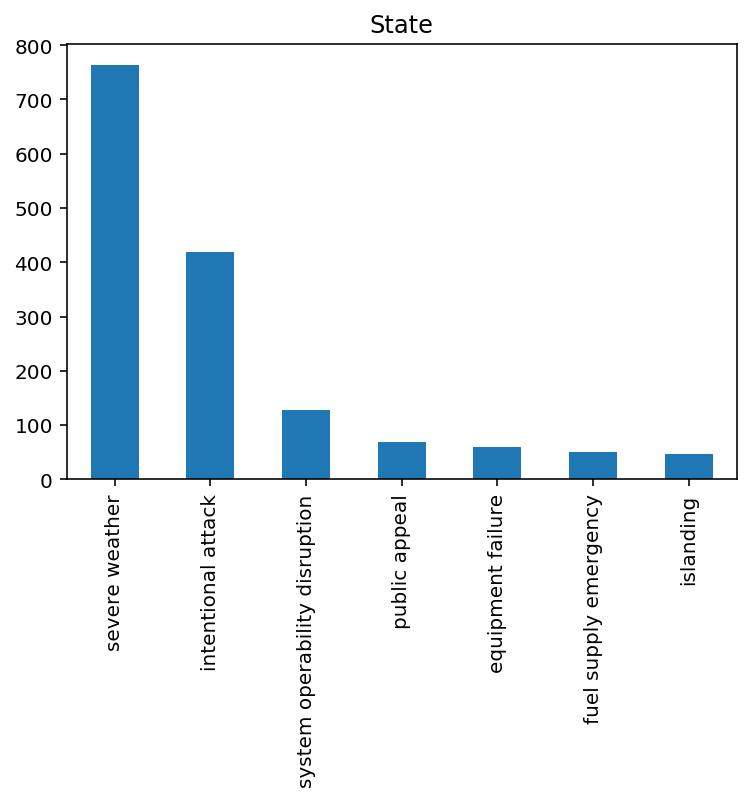

In [8]:
#Plot of Cause Category
plot = out['CAUSE.CATEGORY'].value_counts().plot(kind='bar',title='State')
plt.show()

Making a plot to find out the relationship between 2 variables. Find out that each state has totally different climate.

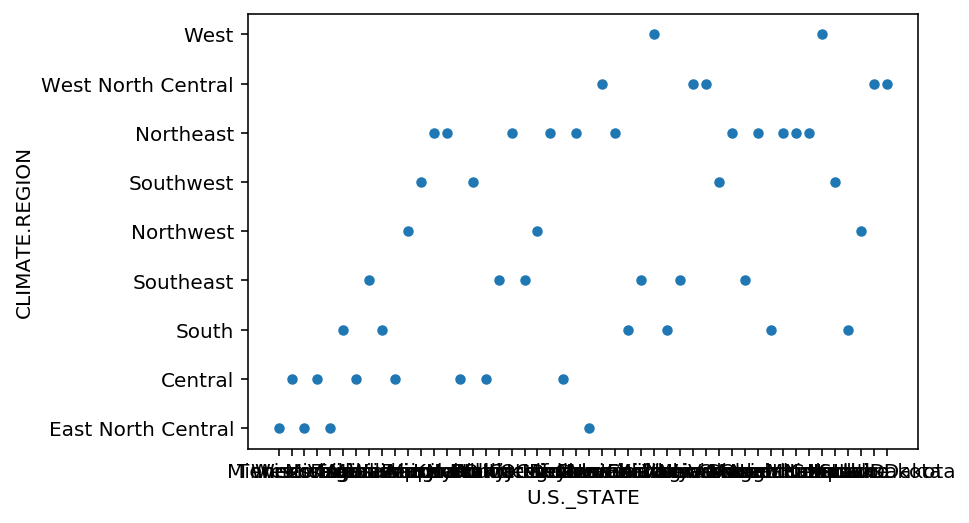

In [9]:
#Bivariate Analysis
#Check the relationship between Climate Region and State
cleaned = out[['CLIMATE.REGION','U.S._STATE']].dropna()
#Plot 2 variables using scatter plot
sns.scatterplot(y = cleaned['CLIMATE.REGION'], x = cleaned['U.S._STATE'])

Making a plot to find out the relationships between climate region and cause category. The plot shows that cause category in each state equally happened.

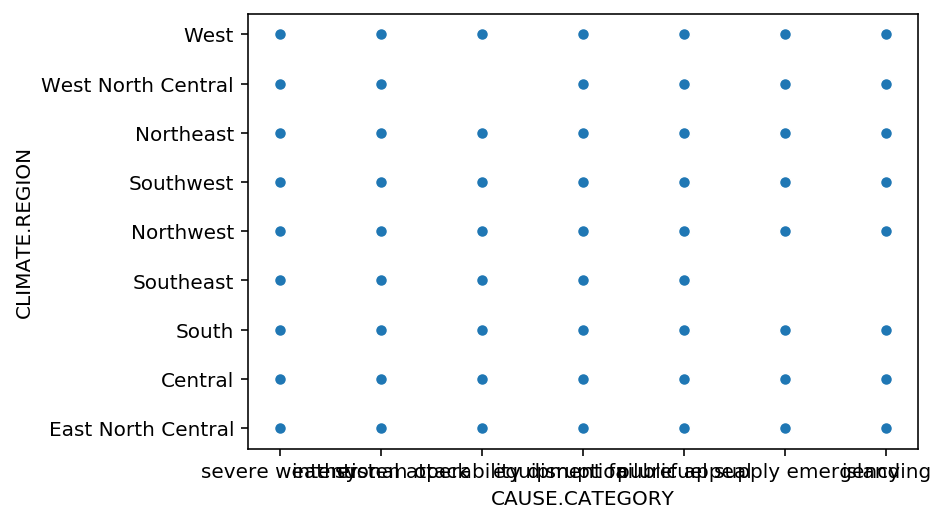

In [10]:
#Check the relationship between Climate Region and Cause Category
new_cleaned = out[['CLIMATE.REGION','CAUSE.CATEGORY']].dropna()
#Plot these 2 variables using scatter plots
sns.scatterplot(y = new_cleaned['CLIMATE.REGION'], x = new_cleaned['CAUSE.CATEGORY'])

Making aggregate analysis. Count the OUTAGE.DURATION in each climate region.

In [11]:
#Interesting Aggregates
#the relationship between CLIMATE REGION and OUTAGE DURATION
out[['CLIMATE.REGION','OUTAGE.DURATION']].dropna().groupby('CLIMATE.REGION').sum()

,OUTAGE.DURATION
CLIMATE.REGION,
Central,515916
East North Central,733230
Northeast,1029130
Northwest,156709
South,620450
Southeast,332653
Southwest,137820
West,333808
West North Central,11145


Making a pivot table to show that in each year, the sum up duration in each climate region. Values are so fluctuant.

In [12]:
#Selecting 3 variables and make a pivot table
out[['CLIMATE.REGION','OUTAGE.DURATION','YEAR']].dropna().pivot_table(index = ['CLIMATE.REGION'],values = 'OUTAGE.DURATION',columns=['YEAR'],aggfunc=np.sum)

YEAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
CLIMATE.REGION,,,,,,,,,,,,,,,,,
Central,1200.0,NaN,15420.0,11057.0,17940.0,42139.0,11375.0,12126.0,88731.0,102704.0,38003.0,63018.0,58818.0,31234.0,18930.0,2022.0,1199.0
East North Central,NaN,NaN,3600.0,73785.0,27260.0,56129.0,13500.0,32406.0,54012.0,110654.0,38937.0,57034.0,21676.0,54494.0,170635.0,15690.0,3418.0
Northeast,681.0,597.0,9390.0,61525.0,16843.0,19616.0,80993.0,23475.0,71932.0,15564.0,151839.0,225895.0,184547.0,26630.0,99652.0,16924.0,23027.0
Northwest,NaN,NaN,NaN,8028.0,9720.0,NaN,72593.0,8316.0,448.0,1204.0,5160.0,15070.0,8392.0,6742.0,2695.0,12911.0,5430.0
South,2709.0,11747.0,20040.0,10429.0,40548.0,58832.0,3265.0,33566.0,182819.0,30990.0,34140.0,46084.0,23081.0,61779.0,7065.0,37775.0,15581.0
Southeast,32304.0,241.0,2921.0,5993.0,87898.0,94825.0,3015.0,1201.0,18787.0,8056.0,4189.0,22211.0,13257.0,7595.0,21368.0,7187.0,1605.0
Southwest,66.0,NaN,NaN,135.0,99058.0,NaN,2579.0,283.0,871.0,6925.0,2666.0,9134.0,624.0,9449.0,911.0,513.0,4606.0
West,NaN,5224.0,15143.0,43060.0,10913.0,14062.0,20143.0,14807.0,41215.0,5417.0,36211.0,45292.0,14495.0,10064.0,1853.0,6174.0,49735.0
West North Central,NaN,NaN,NaN,NaN,4.0,NaN,9600.0,NaN,60.0,346.0,233.0,720.0,NaN,126.0,56.0,NaN,NaN


### Assessment of Missingness

below is our dataframe after cleaning up

In [26]:
pd.set_option('display.max_columns', None)
out

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
1,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00,severe weather,NaN,NaN,3060,NaN,70000,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736,276286,10673,2595696,88.9448,10.644,0.411181,51268,47586,1.07738,1.6,4802,274182,1.75139,2.2,5348119,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
2,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860,284978,9898,2640737,88.8335,10.7916,0.37482,53499,49091,1.08979,1.9,5226,291955,1.79,2.2,5457125,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
3,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00,severe weather,heavy wind,NaN,3000,NaN,70000,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291,276463,10150,2586905,88.9206,10.687,0.392361,50447,47287,1.06683,2.7,4571,267895,1.70627,2.1,5310903,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
4,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00,severe weather,thunderstorm,NaN,2550,NaN,68200,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336,278466,11010,2606813,88.8954,10.6822,0.422355,51598,48156,1.07148,0.6,5364,277627,1.93209,2.2,5380443,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
5,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00,severe weather,NaN,NaN,1740,250,250000,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674,289044,9812,2673531,88.8216,10.8113,0.367005,54431,49844,1.09203,1.7,4873,292023,1.6687,2.2,5489594,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,2011-12-06 00:00:00,08:00:00,2011-12-06 00:00:00,20:00:00,public appeal,NaN,NaN,720,155,34500,8.41,7.8,6.2,7.56,488853,438133,386693,1313678,37.2125,33.3516,29.4359,330738,60017,3639,394394,83.8598,15.2175,0.922681,57012,47586,1.19808,9.8,934,39067,2.39076,0.5,685326,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,2011-12-06 08:00:00,2011-12-06 20:00:00
1531,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,NaN,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997,53709,2331,366037,84.6901,14.6731,0.636821,42913,48909,0.877405,3.5,1019,27868,3.65652,0.7,649422,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.599

Q1. Nmar columns has month since CLIMATE.REGION, CLIMATE.CATEGORY, MONTH. 

CLIMATE.REGION, since some area is 
hard to determine which region it belongs to, mightbe at the edge of two region, hence it does not 
shows in the data to make it mar, we need more accurate geographic location.

MONTH is nmar since this missing in it relates to much more details about the weather, the climate, the global politic
machine warrentship and other relationship hence it's undetermine by all of the data given in the table

CLIMATE.CATEGORY is nmar since the missingness is not determined by other columns, missingness in this column might be due to hard to determined whethere the weather is hot or normal when it's only a little hotter than usual.

### Two column analysis

For Assessment of Missingness question 2, I will pick the column CAUSE.CATEOGORY to study their 
behavior and analysis them with permutation test
below is my permutation test

In [28]:
def per(outage,col,check_dep):#permutation test method using tvds
    distr = (
        outage
        .assign(is_null=outage[check_dep].isnull())
        .pivot_table(index='is_null', columns=col, aggfunc='size',fill_value = 0)
        .apply(lambda x:x / x.sum(), axis=1)
    )
    #determine the obeservation result
    obs = distr.iloc[-1].abs().sum() / 2
    #setting up with 500 repetition
    n_repetitions = 500
    tvds = []
    for i in range(n_repetitions):
        shuffled_col = (
            outage[col]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )
        #shuffled the column we are trying to study,
    
        shuffled = (
            outage
            .assign(**{
                col: shuffled_col,
                'is_null': outage[check_dep].isnull()
            })
        )
        #insert a column of 'is_null'
        shuffled = (
            shuffled
            .pivot_table(index='is_null', columns=col, aggfunc='size',fill_value=0)
            .apply(lambda x:x / x.sum(), axis=1)
        )
        #get the tvds for each shuffled and append it into a list
        tvd = shuffled.diff().iloc[-1].abs().sum() / 2
        tvds.append(tvd)
    #return p value
    p_value = np.mean(tvds>obs)
    return p_value

In [32]:
outage = out.copy()
a=per(outage,'CAUSE.CATEGORY', 'ANOMALY.LEVEL')
b=per(outage,'CAUSE.CATEGORY', 'CLIMATE.REGION')
c=per(outage,'CAUSE.CATEGORY', 'POPDEN_UC')
d=per(outage,'CAUSE.CATEGORY', 'POPDEN_RURAL')
[a,b,c,d]

[0.014, 0.096, 0.012, 0.006]

In this case, when we set the significant level to be the most common 0.05 
since a<0.05 and b >0.05,c<0.05 and d<0.05
We need to reject the hypothesis that cause.category is not dependent on ANOMALY.LEVEL, POPDEN_UC
and POPDEN_RURAL
which means that they are dependent with each other
But we failed to reject that cause.category is not dependent on ANOMALY.LEVEL
which means that they are not dependent with each other.

### Hypothesis Test

Null hypothesis: The probability that an outage occurs in the South during 2011 is equal to the probability that it occurs in the West during 2011 p(South|2011)=p(West|2011)

Alternative hypothesis: The probability that an outage occurs in the South during 2011 is not equal to the probability that it occurs in the West during 2011 p(South|2011)!=p(West|2011)

we use a significant level of 0.05

In [80]:

table_2011 = out[out['YEAR']==2011]
obs_S2011 = len(table_2011[table_2011['CLIMATE.REGION']=='South']) # obtain the observe value of south 2011
obs_W2011 = len(table_2011[table_2011['CLIMATE.REGION']=='West']) # obtain the observe value of south 2012
total_occurance = obs_S2011+obs_W2011
total_occurance

51

In [81]:
N = 10000

# choose a place evenly for total_occurance time
results = []
for _ in range(N):
    simulation = np.random.choice(['S', 'W'], p = [0.5, 0.5], size = total_occurance) #array of Ne or W stands for Northeast or west
    sim_South = (simulation == 'S').sum()  # test stastistic
    results.append(sim_South)
p_value = (pd.Series(results)>obs_N2011).mean() #obtain p value
p_value

0.0117

since the p_value is lower than the significant level, we can reject the null hypothesis that:
    
The probability that an outage occurs in the South during 2011 is equal to the probability that it occurs in the West during 2011 p(South|2011)=p(West|2011) 